# Homework Week 06

## Thomas Plaisier

The goal of this homework is to modify a sequential mnist code into a data parallel code with Horovod and test the scaling efficiency

Provide the link to your ./homework folder on your personal GitHub repo.

    Bonus: The accuracy for large scale training can be improved by using smaller learning rate in the beginning few epochs (warmup epochs). Implement the warmup epochs


## 50%: Modify the ./homework/tensorflow2_mnist.py to Horovod (save it as "./homework/tensorflow2_mnist_hvd.py"

I modified the example code to run on Horovod: additions are marked with e.g "### 1." and follow the ordering of steps from the lecture.

## 25%: Run scaling test upto 16 nodes, and check the overall timing.

Total training time:

Nodes       Time
1           28.95
2           45.80
4           41.02
8           51.72


## 25%: Plot the training accuracy and validation accuracy curve for different scales. (x-asix: epoch; y-axis: accuracy) Save your plots as pdf files in the ./homework folder "accuracy_1.pdf, accuracy_2.pdf, accuracy_4.pdf, accuracy_8.pdf".

Saved figure accuracy1.
Saved figure accuracy2.
Saved figure accuracy4.
Saved figure accuracy8.


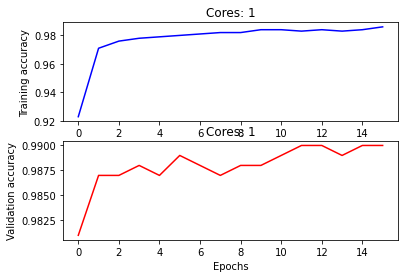

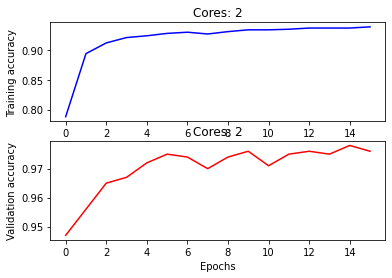

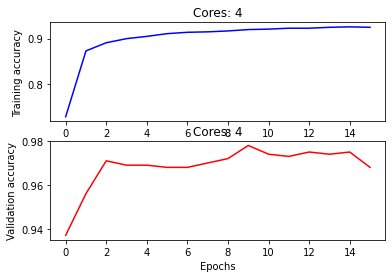

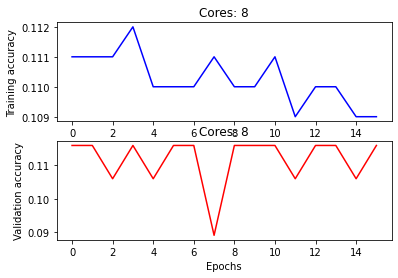

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import glob

# Load log file.
for n in [1, 2, 4, 8]:
    this_log = f'mnist_log_n_{n}.log'

    file_read = open(this_log, "r")

    lines = file_read.readlines()

    training_accuracy = []
    validation_accuracy = []

# E[0], train Loss: 0.354682, training Acc: 0.889, val loss: 0.066, val Acc: 0.979	 Time: 5.483 seconds
    training_expression = 'training Acc: (?P<t>\w+\.\w+)'
    training_object = re.compile(training_expression)

    validation_expression = 'val Acc: (?P<v>\w+\.\w+)'
    validation_object = re.compile(validation_expression)

    for line in lines:
        is_training = training_object.search(line)
        if is_training is not None:
            acc = is_training.group('t')
            training_accuracy.append(float(acc))

        is_validation = validation_object.search(line)
        if is_validation is not None:
            acc = is_validation.group('v')
            validation_accuracy.append(float(acc))

    file_read.close()

    # dt_string = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    # network_name = network_folder[0:-1]
    # Plot.
    plt.figure()
    plt.subplot(211)
    plt.plot(training_accuracy, color='blue')
    plt.title(f'Cores: {n}')
    plt.xlabel("Epochs")
    plt.ylabel("Training accuracy")
    # plot accuracy
    plt.subplot(212)
    plt.plot(validation_accuracy, color='red')
    plt.title(f'Cores: {n}')
    plt.xlabel("Epochs")
    plt.ylabel("Validation accuracy")
    # save plot to file
    plt.savefig(f'accuracy_{n}.pdf')
    plt.savefig(f'accuracy_{n}.png')
    # plt.close()
    print(f'Saved figure accuracy{n}.')

## Bonus: The accuracy for large scale training can be improved by using smaller learning rate in the beginning few epochs (warmup epochs). Implement the warmup epochs


Implemented as:

```
    ### Bonus: 3 warmup epochs.
    warmup_epochs = 3
    if ep < warmup_epochs:
        ep_lr = 0.1*base_lr
        opt.learning_rate = ep_lr
    else:
        opt.learning_rate = base_lr

Saved figure accuracy1.
Saved figure accuracy2.
Saved figure accuracy4.
Saved figure accuracy8.


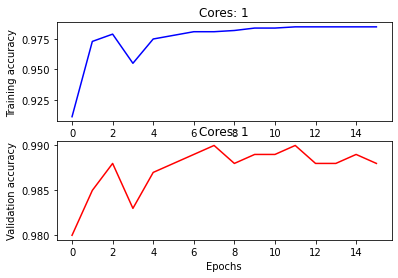

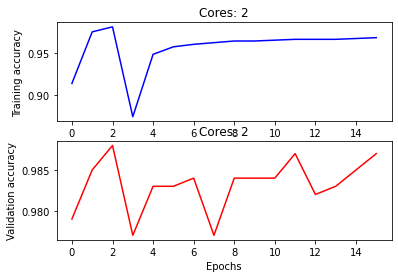

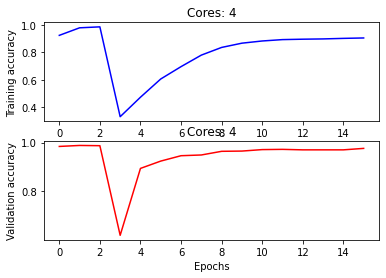

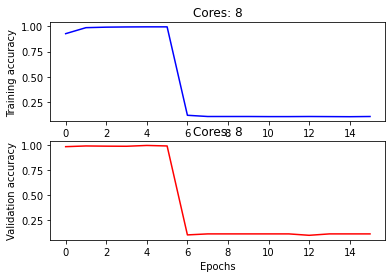

In [6]:
# Load log file.
for n in [1, 2, 4, 8]:
    this_log = f'mnist_log_n_{n}_wu.log'

    file_read = open(this_log, "r")

    lines = file_read.readlines()

    training_accuracy = []
    validation_accuracy = []

    training_expression = 'training Acc: (?P<t>\w+\.\w+)'
    training_object = re.compile(training_expression)

    validation_expression = 'val Acc: (?P<v>\w+\.\w+)'
    validation_object = re.compile(validation_expression)

    for line in lines:
        is_training = training_object.search(line)
        if is_training is not None:
            acc = is_training.group('t')
            training_accuracy.append(float(acc))

        is_validation = validation_object.search(line)
        if is_validation is not None:
            acc = is_validation.group('v')
            validation_accuracy.append(float(acc))

    file_read.close()

    # dt_string = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    # network_name = network_folder[0:-1]
    # Plot.
    plt.figure()
    plt.subplot(211)
    plt.plot(training_accuracy, color='blue')
    plt.title(f'Cores: {n}')
    plt.xlabel("Epochs")
    plt.ylabel("Training accuracy")
    # plot accuracy
    plt.subplot(212)
    plt.plot(validation_accuracy, color='red')
    plt.title(f'Cores: {n}')
    plt.xlabel("Epochs")
    plt.ylabel("Validation accuracy")
    # save plot to file
    plt.savefig(f'accuracy_{n}_wu.pdf')
    plt.savefig(f'accuracy_{n}_wu.png')
    # plt.close()
    print(f'Saved figure accuracy{n}.')